# Step_1:Libraries/packages

In [106]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV, KFold,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler




# Step-2

Dataset is loaded onto the project and the data is displayed along with its information

In [107]:
dataset=pd.read_csv('dataset_assignment1.csv')
dataset

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1
698,4,8,8,5,4,5,10,4,1,1


In [108]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null    int64
 4   feature5  700 non-null    int64
 5   feature6  700 non-null    int64
 6   feature7  700 non-null    int64
 7   feature8  700 non-null    int64
 8   feature9  700 non-null    int64
 9   class     700 non-null    int64
dtypes: int64(10)
memory usage: 54.8 KB


# Step-3:Understand the Dataset

Number of samples for each class in the dataset is displayed

In [109]:
data=np.array(dataset)
mask0=(data[:,9]==0)
mask1=(data[:,9]==1)
data_0=data[mask0,:]
data_1=data[mask1,:]
print("No of class 0 elements :",len(data_0))
print("No of class 1 elements :",len(data_1))

No of class 0 elements : 459
No of class 1 elements : 241


Histogram to visualise the dataset, besed on each columns

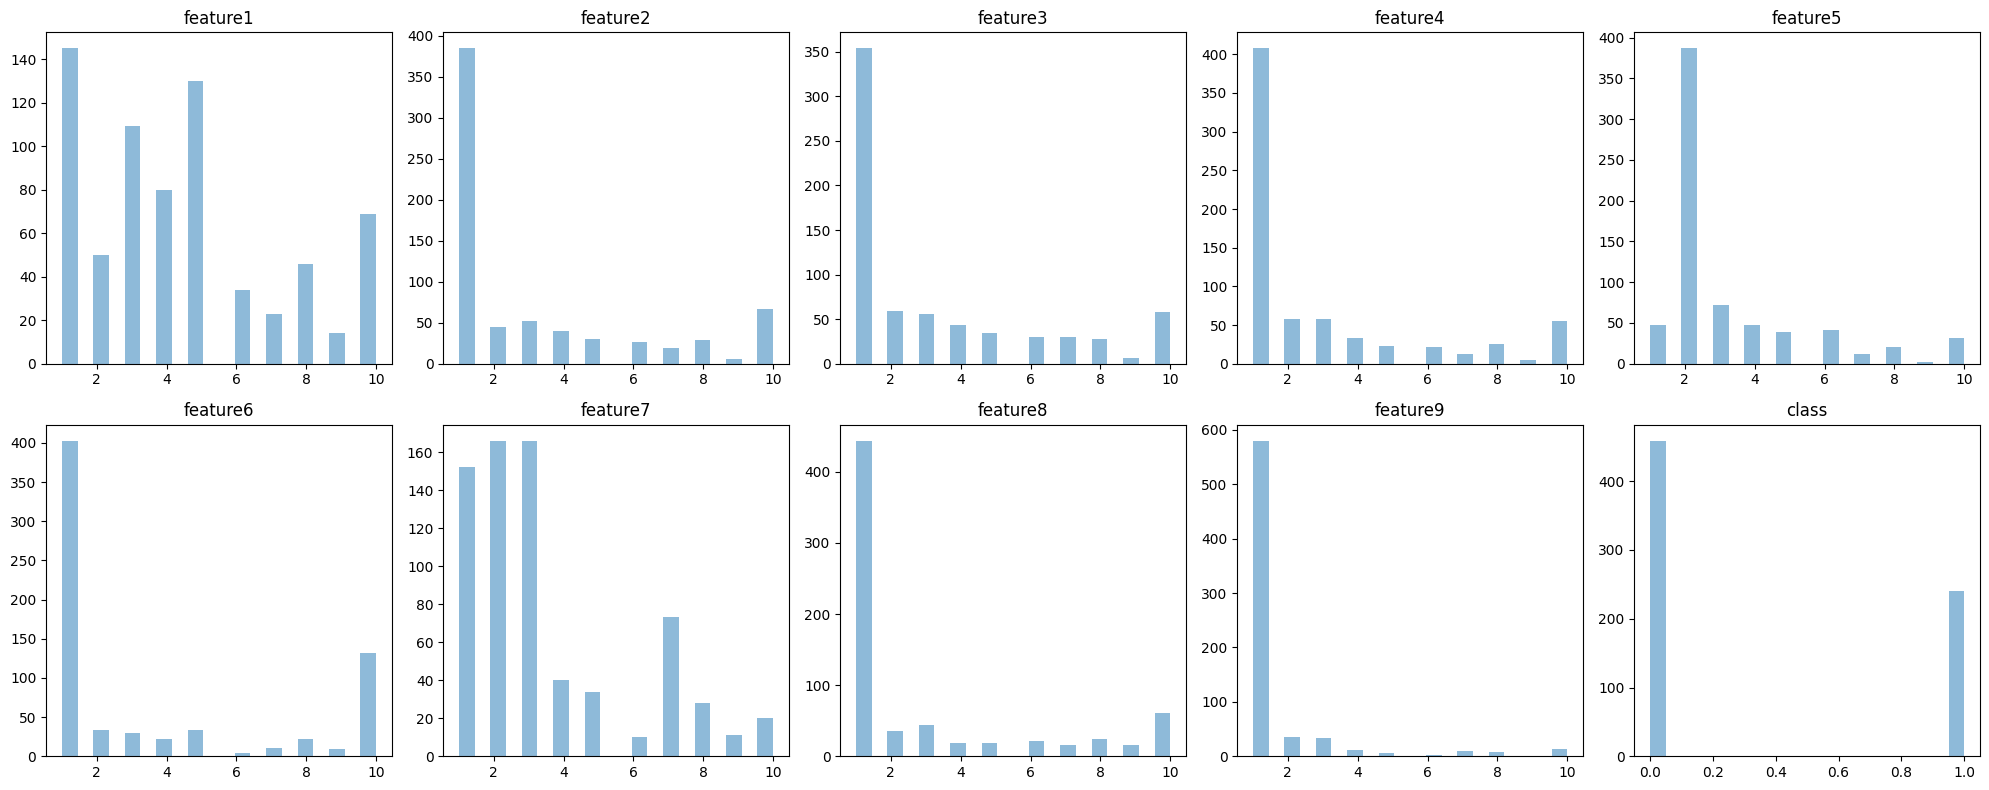

In [110]:
# Get the names of the features
columns = dataset.columns[:]

# Create a figure with 10 subplots
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
ax = ax.ravel()
# Loop through each feature and create a histogram
for i, feature in enumerate(columns):
    ax[i].hist(dataset[feature], bins=20, alpha=0.5)
    ax[i].set_title(feature)
# Adjust the spacing between the subplots
fig.tight_layout()
# Display the plot
plt.show()


Scatterplot to visualise whole dataset

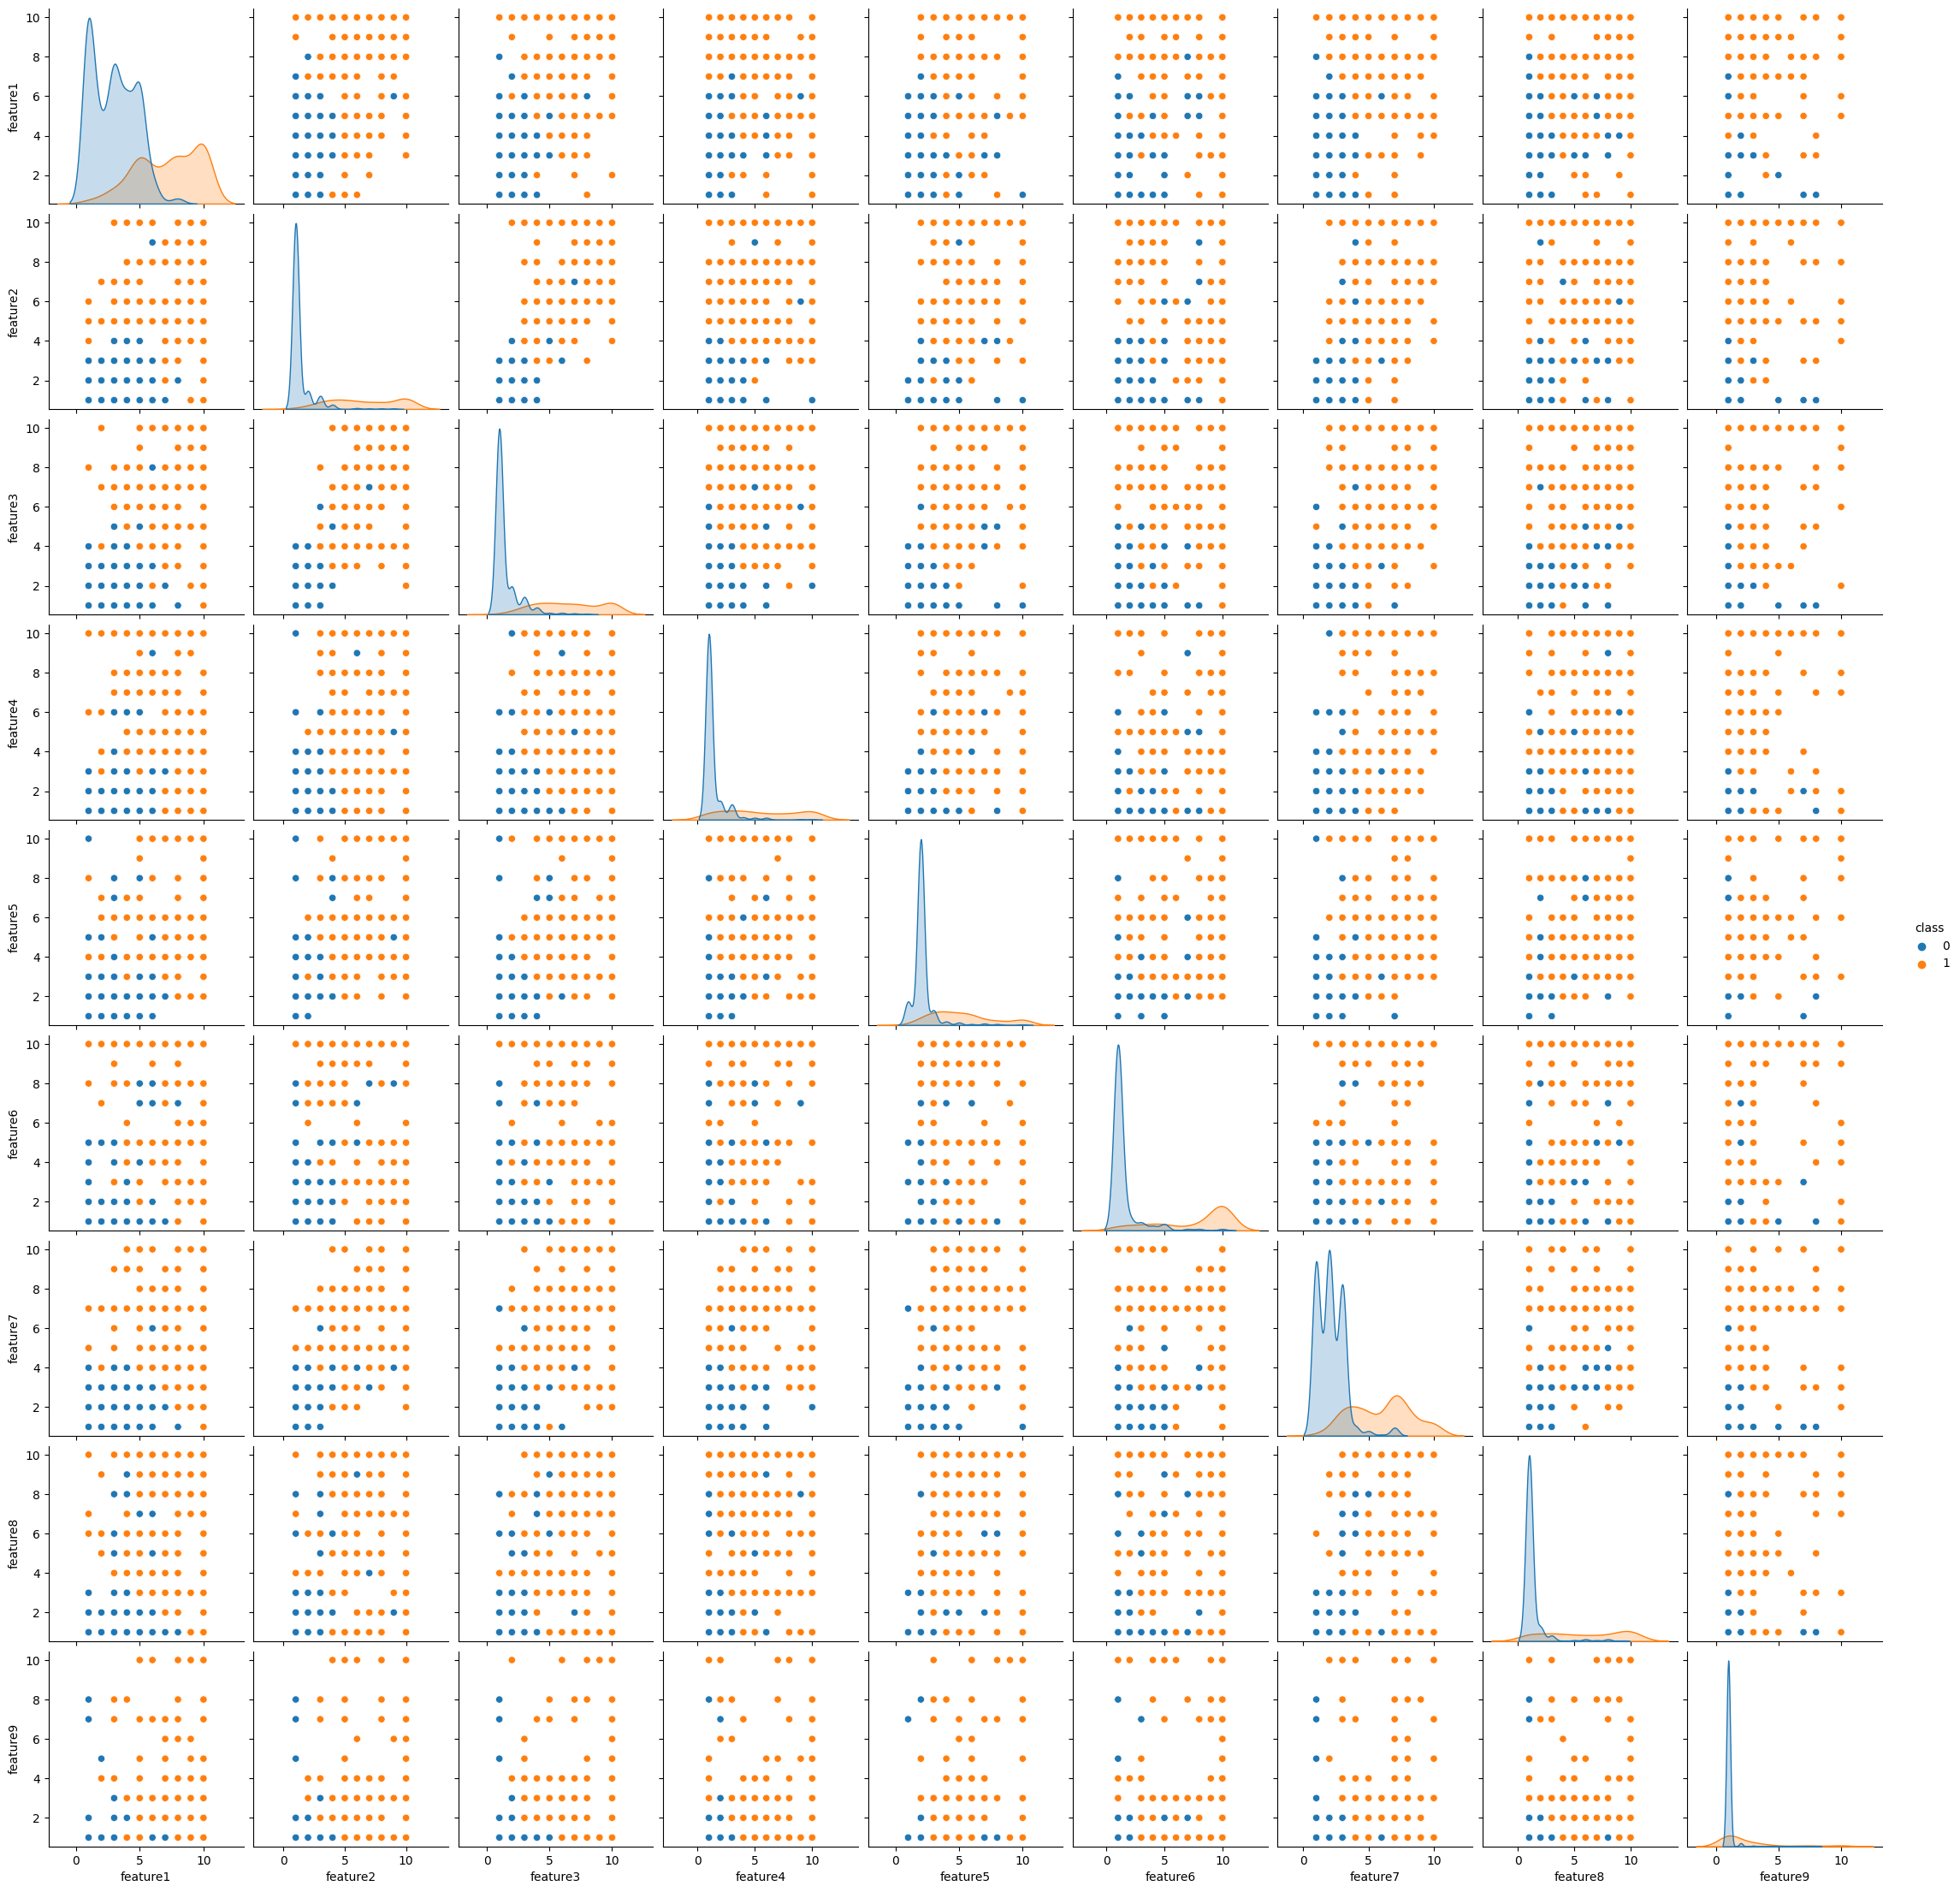

In [111]:
feature_cols = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9']

sns.pairplot(data=dataset, vars=feature_cols, hue='class')

Visualise the number of elements belonging to each class

<Axes: xlabel='class', ylabel='count'>

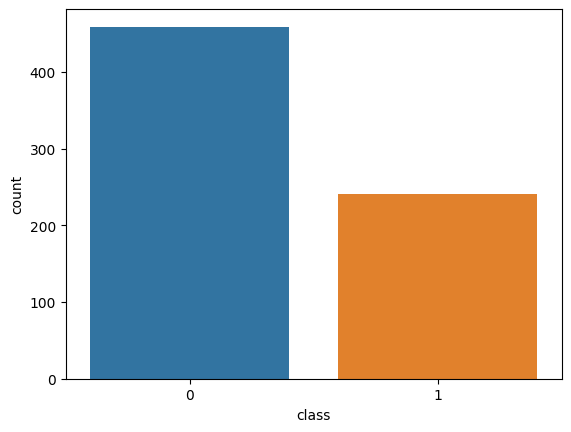

In [112]:
sns.countplot(x='class', data=dataset)

Correlation matrix to visualise whole dataset

<Axes: >

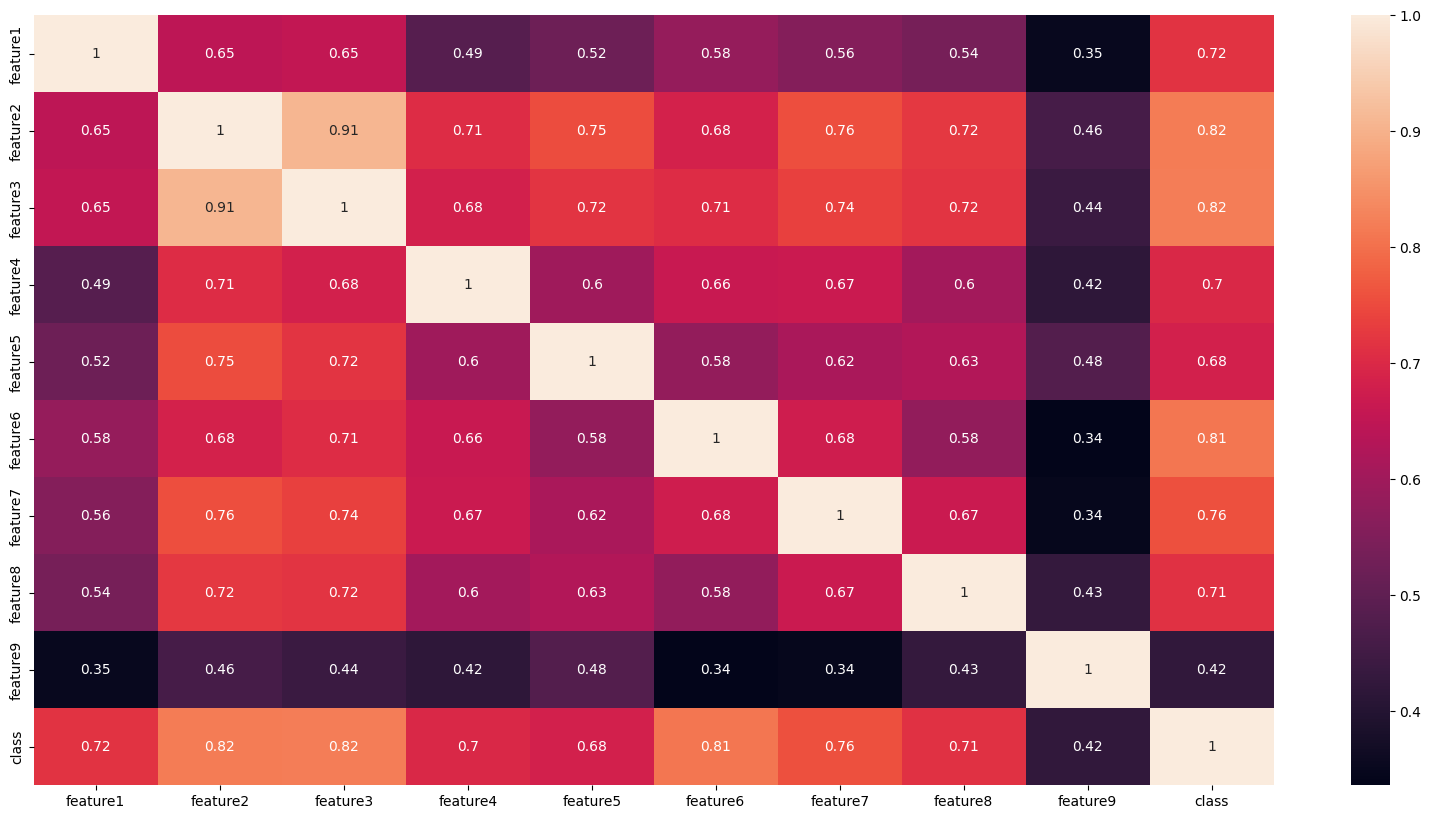

In [113]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),annot=True)

For each class,the statistical description of features (e.g., the input
variable x), such as mean, std, max and min values, etc is shown

In [114]:
def Statistical_Info(data):

 df=pd.DataFrame(data[:,:9], columns=['feature1','feature2','feature3','feature4','feature5','feature6','feature7','feature8','feature9'])
# calculate summary statistics using describe()
 summary = df.describe()
# display the summary statistics as a table
 return summary

In [115]:
print("Statistical Info for Class-0")
Statistical_Info(data_0)

Statistical Info for Class-0


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
count,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000
mean,2.956427,1.324619,1.442266,1.363834,2.119826,1.437908,2.102397,1.289760,1.063181
std,1.672490,0.906830,0.996960,0.995886,0.916145,1.310839,1.079976,1.057787,0.501456
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
75%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
max,8.000000,9.000000,8.000000,10.000000,10.000000,10.000000,7.000000,9.000000,8.000000


In [116]:

print("Statistical Info for Class-1")
Statistical_Info(data_1)

Statistical Info for Class-1


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.195021,6.572614,6.560166,5.547718,5.298755,7.593361,5.979253,5.863071,2.589212
std,2.428849,2.719512,2.562045,3.210465,2.451606,3.129263,2.273852,3.350672,2.557939
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,3.000000,1.000000
50%,8.000000,6.000000,6.000000,5.000000,5.000000,10.000000,7.000000,6.000000,1.000000
75%,10.000000,10.000000,9.000000,8.000000,6.000000,10.000000,7.000000,10.000000,3.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# Step 4:Split data into a training dataset and a testing dataset (i.e., 80% v.s. 20%) 

In [117]:
#Input data and class labels are extrcated from data
X=data[:,:9] 
scaler = MinMaxScaler() 
#Input values are normalised using MinMaxScaler to improve performance of model
X_norm = scaler.fit_transform(X)
y=data[:,9]
#Data is split into train and test data(ie,80%vs20%)
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=42)



# Step 5: Classifier selection,training and testing model

# Classifier 1: Decision Tree

In [118]:
#Decision Tree classifier from 'sklearn.tree' is declared
dt = DecisionTreeClassifier()
# Hyper-parameters for dt model 
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#K-fold cross validation,k=5
cv = KFold(n_splits=5, shuffle=True, random_state=42)

Create the grid search function which returns best score and best parameters

In [119]:
# Create the grid search function which returns best score and best parameters
def GridSearch_validator(model,param_grid,scoring,cv):
 # Grid Search Cross Validator
 grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=cv)
 # Fit the grid search to the data
 grid_search.fit(X_norm, y)

 best_params = grid_search.best_params_ #best parameters
 best_score = grid_search.best_score_ #best score
 return best_params,best_score
 

Metrics Score and the best hyperparameters suitable for that particular evaluation metrics.

In [120]:
# Best accuracy param with score
best_accuracy_param,best_accuracy_score=GridSearch_validator(dt,param_grid,'accuracy',cv)
print("Accuracy:",best_accuracy_score,"for",best_accuracy_param)
# Best precision param with score
best_precision_param,best_precision_score=GridSearch_validator(dt,param_grid,'precision',cv)
print("Precsion:",best_precision_score,"for",best_precision_param)
# Best recall param with score
best_recall_param,best_recall_score=GridSearch_validator(dt,param_grid,'recall',cv)
print("Recall:",best_recall_score,"for",best_recall_param)
# Best f1 param with score
best_f1_param,best_f1_score=GridSearch_validator(dt,param_grid,'f1',cv)
print("F1 Score:",best_f1_score,"for",best_f1_param)


Accuracy: 0.9442857142857143 for {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Precsion: 0.927459555106168 for {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
Recall: 0.9427736844969254 for {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
F1 Score: 0.918913160733549 for {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}


Model Testing and evaluation based on parameters selected

In [121]:
# Empty lists to store the metrics scores
Accuracy_dt=[]
Precision_dt=[]
Recall_dt=[]
F1_dt=[]
#Function to train,test and evaluate the model based of respective hyperparameters.
def Model_validator(param):
 dt_1=DecisionTreeClassifier(max_depth=param['max_depth'],min_samples_leaf=param['min_samples_leaf'],min_samples_split=param['min_samples_split'])
 dt_1.fit(X_train,y_train)
 y_pred=dt_1.predict(X_test)
 print("Valuation metrics for",param)
 accuracy=accuracy_score(y_test, y_pred)
 precision=precision_score(y_test, y_pred,average='macro')
 recall=recall_score(y_test, y_pred,average='macro')
 f1=f1_score(y_test, y_pred,average='macro')
 results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy,precision,recall,f1]})
 Accuracy_dt.append(accuracy)
 Recall_dt.append(recall)
 Precision_dt.append(precision)
 F1_dt.append(f1)
 #Confusion Matrix
 cm = confusion_matrix(y_test, y_pred)
 cm_display = ConfusionMatrixDisplay(cm).plot()
 report = classification_report(y_test,y_pred)
 print(report)
 return results
 


Model Evaluation based on hyperparameters which gave best score for Accuracy

Valuation metrics for {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        94
           1       0.91      0.89      0.90        46

    accuracy                           0.94       140
   macro avg       0.93      0.92      0.93       140
weighted avg       0.94      0.94      0.94       140



,Metric,Score
0,Accuracy,0.935714
1,Precision,0.929240
2,Recall,0.924376
3,F1 Score,0.926740


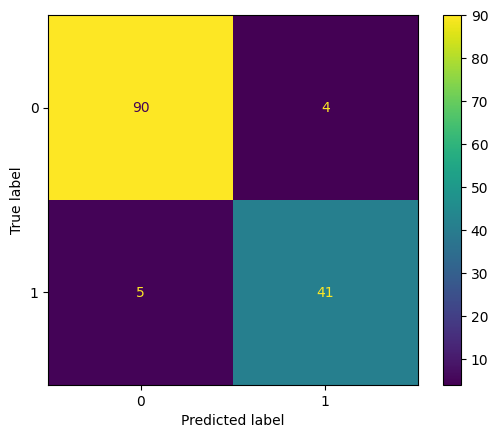

In [122]:
Model_validator(best_accuracy_param)


Model Evaluation based on hyperparameters which gave best score for Precision

Valuation metrics for {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        94
           1       0.93      0.87      0.90        46

    accuracy                           0.94       140
   macro avg       0.93      0.92      0.93       140
weighted avg       0.94      0.94      0.94       140



,Metric,Score
0,Accuracy,0.935714
1,Precision,0.934188
2,Recall,0.918825
3,F1 Score,0.925878


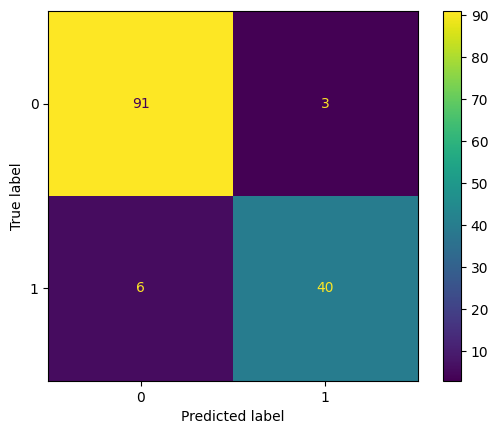

In [123]:
Model_validator(best_precision_param)

Model Evaluation based on hyperparameters which gave best score for Recall

Valuation metrics for {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        94
           1       0.88      0.96      0.92        46

    accuracy                           0.94       140
   macro avg       0.93      0.95      0.94       140
weighted avg       0.95      0.94      0.94       140



,Metric,Score
0,Accuracy,0.942857
1,Precision,0.928889
2,Recall,0.946346
3,F1 Score,0.936594


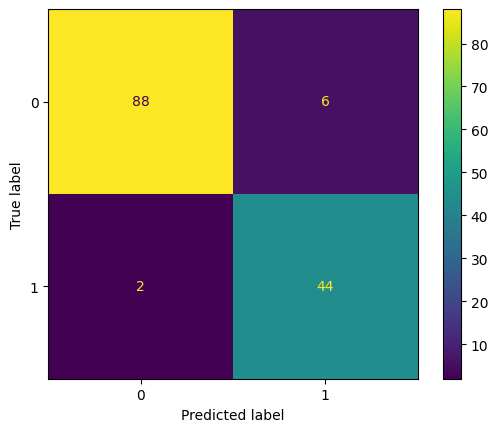

In [124]:
Model_validator(best_recall_param)

Model Evaluation based on hyperparameters which gave best F1 score 

Valuation metrics for {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        94
           1       0.93      0.89      0.91        46

    accuracy                           0.94       140
   macro avg       0.94      0.93      0.93       140
weighted avg       0.94      0.94      0.94       140



,Metric,Score
0,Accuracy,0.942857
1,Precision,0.939867
2,Recall,0.929695
3,F1 Score,0.934503


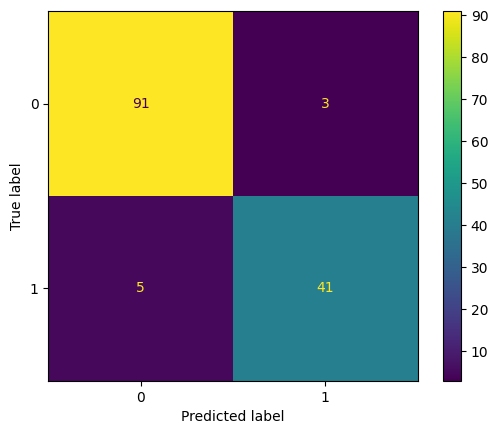

In [125]:
Model_validator(best_f1_param)

# Classifier 2: KNN Classifier

Create the grid search function which returns best score and best parameters

In [126]:
def GridSearch_validator_kNN(scoring):
 k_range=range(1,31,2) # we are using only odd values for k inorder to avoid ties
 k_scores=[]
 k_best_values=[]
 label=str(scoring)

 for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_norm,y,cv=5,scoring=scoring)  #for  classification
    k_scores.append(scores.mean())  
 #plot
 plt.plot(k_range,k_scores)
 plt.xlabel('value of k for knn')
 plt.ylabel(label)
 plt.show()
 # Best k for each evaluation metrics
 best_k = k_range[np.argmax(k_scores)]
 max_score = max(k_scores) 
 return best_k,max_score
 


Metrics Score and the best hyperparameters suitable for that particular evaluation metrics.

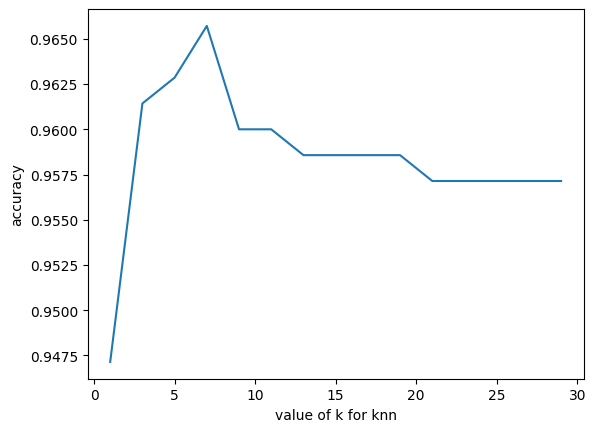

Best Accuracy of 0.9657142857142859 for k-value 7


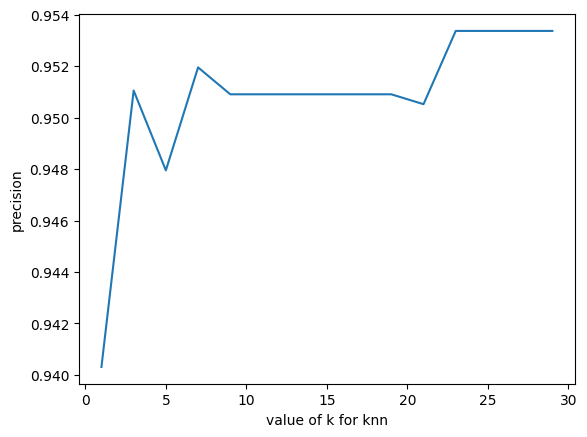

Best Precision of 0.9657142857142859 for k-value 23


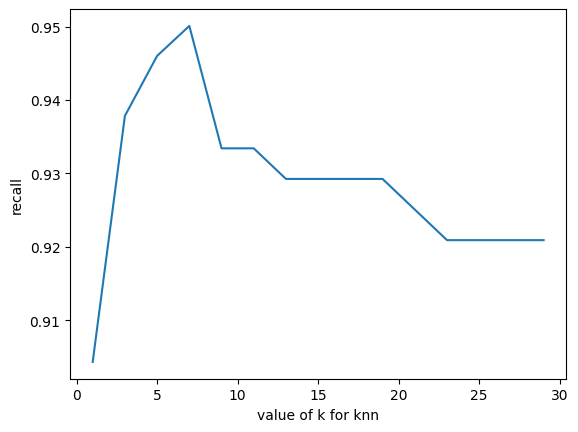

Best Recall of 0.9500850340136054 for k-value 7


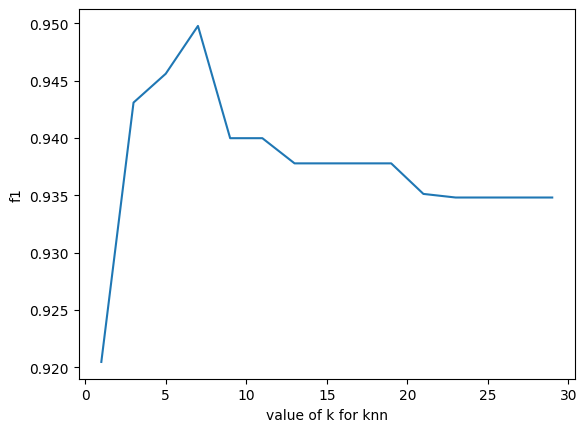

Best F1 score of 0.9497852154760646 for k-value 7


In [127]:
#Best params for Accuracy along with score
best_k_accuracy,best_k_accuracy_score=GridSearch_validator_kNN('accuracy')
print("Best Accuracy of",best_k_accuracy_score,"for k-value",best_k_accuracy)
#Best params for Precision along with score
best_k_precision,best_k_precision_score=GridSearch_validator_kNN('precision')
print("Best Precision of",best_k_accuracy_score,"for k-value",best_k_precision)
#Best params for Recall along with score
best_k_recall,best_k_recall_score=GridSearch_validator_kNN('recall')
print("Best Recall of",best_k_recall_score,"for k-value",best_k_recall)
#Best params for F1 along with score
best_k_f1,best_k_f1_score=GridSearch_validator_kNN('f1')
print("Best F1 score of",best_k_f1_score,"for k-value",best_k_f1)

Model Testing and evaluation based on parameters selected

In [128]:
#Empty list to store evaluation metrics values
Accuracy_KNN=[]
Precision_KNN=[]
Recall_KNN=[]
F1_KNN=[]
# Function to train and test model based on particular k-values
def Model_validator_KNN(k_value):
    knn_best=KNeighborsClassifier(n_neighbors=k_value)
    knn_best.fit(X_train,y_train)
    y_pred = knn_best.predict(X_test)
    print('Valuation Metrics for k-value',k_value)
    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred,average='macro')
    recall=recall_score(y_test, y_pred,average='macro')
    f1=f1_score(y_test, y_pred,average='macro')
    results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy,precision,recall,f1]})
    Accuracy_KNN.append(accuracy)
    Recall_KNN.append(recall)
    Precision_KNN.append(precision)
    F1_KNN.append(f1)
    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    report = classification_report(y_test,y_pred)
    print(report)
    return results

Model evaluation based on parameter which gave best Accuracy score(during Cross validation)

Valuation Metrics for k-value 7
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       0.98      0.96      0.97        46

    accuracy                           0.98       140
   macro avg       0.98      0.97      0.98       140
weighted avg       0.98      0.98      0.98       140



,Metric,Score
0,Accuracy,0.978571
1,Precision,0.978363
2,Recall,0.972942
3,F1 Score,0.975580


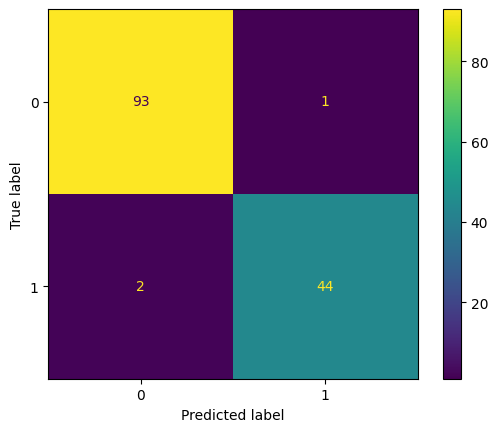

In [129]:
Model_validator_KNN(best_k_accuracy)

Model evaluation based on parameter which gave best precision score(during Cross validation)

Valuation Metrics for k-value 23
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        94
           1       0.98      0.93      0.96        46

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



,Metric,Score
0,Accuracy,0.971429
1,Precision,0.973011
2,Recall,0.962072
3,F1 Score,0.967251


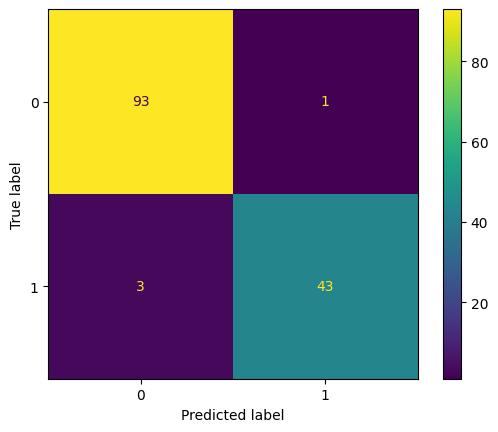

In [130]:
Model_validator_KNN(best_k_precision)

Model evaluation based on parameter which gave best Recall score(during Cross validation)

Valuation Metrics for k-value 7
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       0.98      0.96      0.97        46

    accuracy                           0.98       140
   macro avg       0.98      0.97      0.98       140
weighted avg       0.98      0.98      0.98       140



,Metric,Score
0,Accuracy,0.978571
1,Precision,0.978363
2,Recall,0.972942
3,F1 Score,0.975580


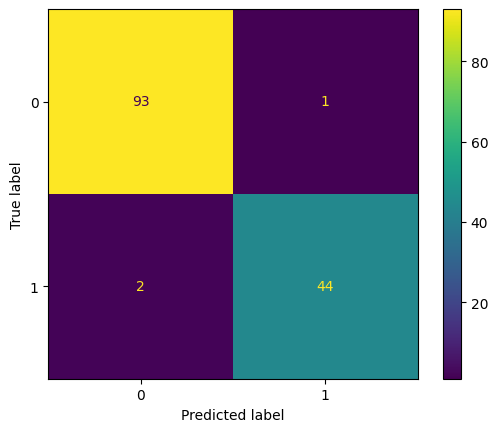

In [131]:

Model_validator_KNN(best_k_recall)

Model evaluation based on parameter which gave best F1 score(during Cross validation)

Valuation Metrics for k-value 7
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       0.98      0.96      0.97        46

    accuracy                           0.98       140
   macro avg       0.98      0.97      0.98       140
weighted avg       0.98      0.98      0.98       140



,Metric,Score
0,Accuracy,0.978571
1,Precision,0.978363
2,Recall,0.972942
3,F1 Score,0.975580


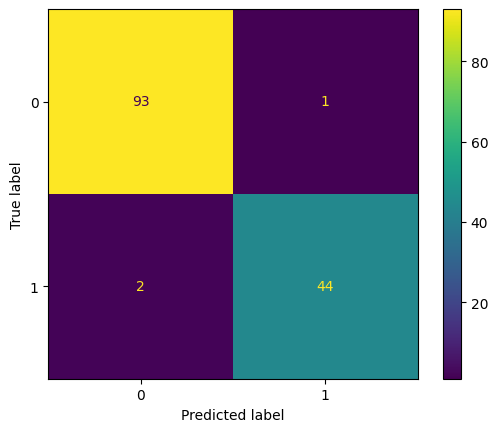

In [132]:
Model_validator_KNN(best_k_f1)

# Classifier 3: SVM(Support Vector Machines)

Initialising model and mentioning the hyperparameters used

In [133]:
svm=SVC()
#Hyper parameters used
param_grid_SVM = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10]}
# 5-fold cross validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

Metrics Score and the best hyperparameters suitable for that particular evaluation metrics. Note: Function for GridSearch validation('GridSearch_validator') is reused, please refer the same on 'Decision Tree' section

In [134]:
best_accuracy_param_SVM,best_accuracy_score_SVM=GridSearch_validator(svm,param_grid_SVM,'accuracy',cv)
print("Accuracy:",best_accuracy_score_SVM,"for",best_accuracy_param_SVM)
best_precision_param_SVM,best_precision_score_SVM=GridSearch_validator(svm,param_grid_SVM,'precision',cv)
print("Precsion:",best_precision_score_SVM,"for",best_precision_param_SVM)
best_recall_param_SVM,best_recall_score_SVM=GridSearch_validator(svm,param_grid_SVM,'recall',cv)
print("Recall:",best_recall_score_SVM,"for",best_recall_param_SVM)
best_f1_param_SVM,best_f1_score_SVM=GridSearch_validator(svm,param_grid_SVM,'f1',cv)
print("F1 Score:",best_f1_score_SVM,"for",best_f1_param_SVM)

Accuracy: 0.97 for {'C': 1, 'kernel': 'linear'}
Precsion: 0.9587736738106095 for {'C': 0.1, 'kernel': 'poly'}
Recall: 0.9712058914222489 for {'C': 0.1, 'kernel': 'rbf'}
F1 Score: 0.9569042570967297 for {'C': 1, 'kernel': 'linear'}


Model Testing and evaluation based on parameters selected

In [135]:
# Empty list to store metrics values 
Accuracy_SVM=[]
Precision_SVM=[]
Recall_SVM=[]
F1_SVM=[]
# Function to train and test SVM model based on respective hyperparameters
def Model_validator_SVM(param):
 svm_1=SVC(kernel=param['kernel'],C=param['C'])
 svm_1.fit(X_train,y_train)
 y_pred=svm_1.predict(X_test)
 print('Valuation Metrics for parameters',param)
 accuracy=accuracy_score(y_test, y_pred)
 precision=precision_score(y_test, y_pred,average='macro')
 recall=recall_score(y_test, y_pred,average='macro')
 f1=f1_score(y_test, y_pred,average='macro')
 results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy,precision,recall,f1]})
 Accuracy_SVM.append(accuracy)
 Recall_SVM.append(recall)
 Precision_SVM.append(precision)
 F1_SVM.append(f1)
 #Confusion Matrix
 cm = confusion_matrix(y_test, y_pred)
 cm_display = ConfusionMatrixDisplay(cm).plot()
 report = classification_report(y_test,y_pred)
 print(report)
 return results

Model evaluation based on parameter which gave best Accuracy score(during Cross validation)

Valuation Metrics for parameters {'C': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        94
           1       0.98      0.93      0.96        46

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



,Metric,Score
0,Accuracy,0.971429
1,Precision,0.973011
2,Recall,0.962072
3,F1 Score,0.967251


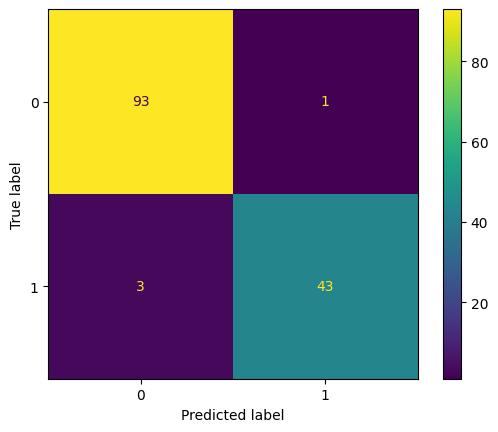

In [136]:
Model_validator_SVM(best_accuracy_param_SVM)

Model evaluation based on parameter which gave best Precision score(during Cross validation)

Valuation Metrics for parameters {'C': 0.1, 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        94
           1       0.98      0.91      0.94        46

    accuracy                           0.96       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140



,Metric,Score
0,Accuracy,0.964286
1,Precision,0.967754
2,Recall,0.951203
3,F1 Score,0.958821


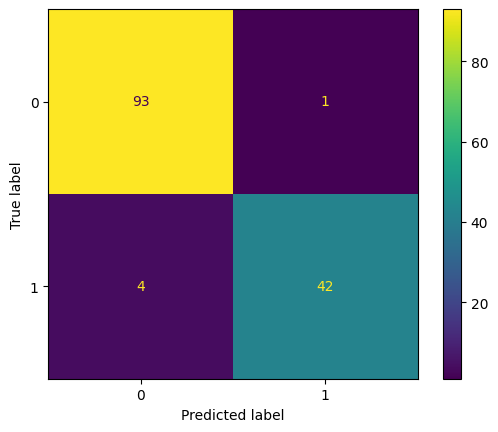

In [137]:
Model_validator_SVM(best_precision_param_SVM)

Model evaluation based on parameter which gave best Recall score(during Cross validation)

Valuation Metrics for parameters {'C': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        94
           1       0.92      0.96      0.94        46

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



,Metric,Score
0,Accuracy,0.957143
1,Precision,0.947464
2,Recall,0.956984
3,F1 Score,0.951956


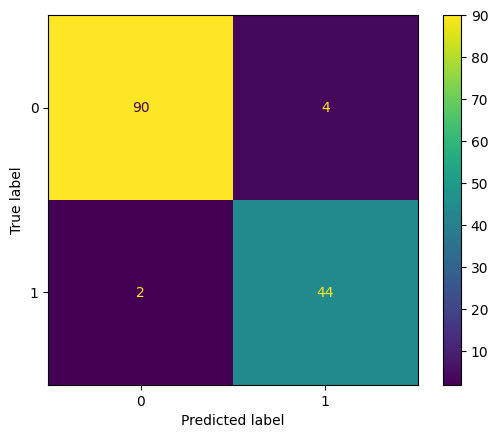

In [138]:
Model_validator_SVM(best_recall_param_SVM)

Model evaluation based on parameter which gave best F1 score(during Cross validation)

Valuation Metrics for parameters {'C': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        94
           1       0.98      0.93      0.96        46

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



,Metric,Score
0,Accuracy,0.971429
1,Precision,0.973011
2,Recall,0.962072
3,F1 Score,0.967251


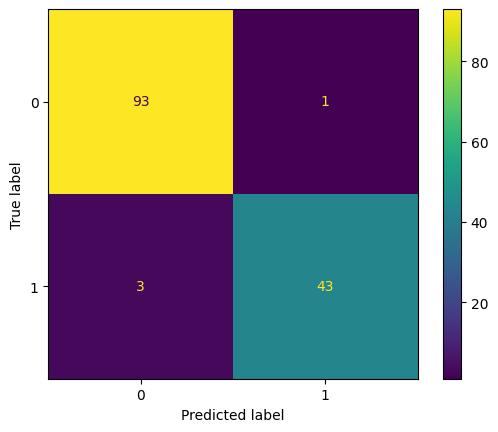

In [139]:
Model_validator_SVM(best_f1_param_SVM)

# Conclusion: 

We displayed the max score noticed for each evaluation metrics for respective models

In [140]:

results = {
    'Decision Tree': {'Accuracy': max(Accuracy_dt), 'Precision': max(Precision_dt), 'Recall': max(Recall_dt), 'F1 Score': max(F1_dt)},
    'K-Nearest Neighbours': {'Accuracy': max(Accuracy_KNN), 'Precision': max(Precision_KNN), 'Recall': max(Recall_KNN), 'F1 Score': max(F1_KNN)},
    'Support Vector Machine': {'Accuracy': max(Accuracy_SVM), 'Precision': max(Precision_SVM), 'Recall': max(Recall_SVM), 'F1 Score': max(F1_SVM)},
}

df = pd.DataFrame.from_dict(results, orient='index')

# display the DataFrame
df

,Accuracy,Precision,Recall,F1 Score
Decision Tree,0.942857,0.939867,0.946346,0.936594
K-Nearest Neighbours,0.978571,0.978363,0.972942,0.975580
Support Vector Machine,0.971429,0.973011,0.962072,0.967251
